In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models

* loading mnist dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

* Split data in train images, labels and test images,labels

In [3]:
(img_train, label_train), (img_test, label_test) = fashion_mnist.load_data()

* Use 60000 training images, scaled down to 28*28 pixels and grayscale (represented by 1 in reshape)
* Normalize the images for value between 0,1 by dividing by 255.0

In [4]:
img_train = img_train.reshape(60000, 28, 28, 1)
img_train = img_train / 255.0

In [5]:
img_test = img_test.reshape(10000, 28, 28, 1)
img_test = img_test / 255.0

* Creation of the model:
    * sequential defines that more layers can be added in sequence
    * keras api to create neural network
    * dense defines a layer of connected neurons, 1 dense = 1 layer
    * its defines number of neurons in the layer
    * input_shape defines the shape of input fed to the layer
    * 3,3 convolutional layer and 2,2 max pooling layer are being used

In [6]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(
            64, (3, 3), activation="relu", input_shape=(28, 28, 1)
        ),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

* Compile the model
    * sparse_categorical_crossentropy: is the loss function that determines the error in each epoch
    * adam: optimizing function that optimizes the model for next epoch
    * accuracy: parameter being used to measure the performance of the model

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

* Summary of the model:
    * First layer outputs 26,26 images as we are using a 3,3 convolutional layer leading to loss of 2 rows and 2 columns. From 28*28 to 26*26
    * 2,2 max pooling layer make the number of pixels half.
    * flatten =5x5x64=1600 nodes, flatens the layer to be fed to a feed forward neural network

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

* Trainging our model

In [11]:
model.fit(img_train,label_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 805us/sample - loss: 0.4358 - accuracy: 0.8413
Epoch 2/5
60000/60000 [==============================] - 46s 772us/sample - loss: 0.2895 - accuracy: 0.8944
Epoch 3/5
60000/60000 [==============================] - 46s 762us/sample - loss: 0.2438 - accuracy: 0.9104
Epoch 4/5
60000/60000 [==============================] - 45s 751us/sample - loss: 0.2131 - accuracy: 0.9210
Epoch 5/5
60000/60000 [==============================] - 48s 796us/sample - loss: 0.1867 - accuracy: 0.9298


* Evaluating model performance: accuracy 90%

In [12]:
loss=model.evaluate(img_test,label_test)

10000/10000 [==============================] - 2s 238us/sample - loss: 0.2636 - accuracy: 0.9095


* Visualise the convolution:

* Get labels of first 50 images

In [15]:
label_test[:50]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

* You can see that the images at index 2, index 5 and index 15 are all the same value: 1. We will take a look at the result of running the convolution on each, and as we begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between images based on this convolution/pooling combination.

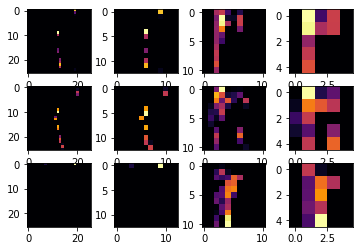

In [22]:
f, axarr = plt.subplots(3,4)
first_image=2
scnd_image=5
thrd_image=15
conv_no = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(img_test[first_image].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, conv_no], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(img_test[scnd_image].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, conv_no], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(img_test[thrd_image].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, conv_no], cmap='inferno')
  axarr[2,x].grid(False)